In [185]:
from random import uniform
from math import sqrt
from time import time
import numpy as np
from multiprocessing import Pool, TimeoutError
import os
from ipyparallel import Client

# Simple Serial

In [25]:
def pi_approx(number_of_darts):
    
    start_time = time()
    number_of_darts_in_circle = 0

    for n in range(number_of_darts):
        x, y, = uniform(0, 1), uniform(0,1)
        if sqrt((x - 0.5)**2 + (y - 0.5)**2) <= 0.5:
            number_of_darts_in_circle += 1
    
    end_time = time()
    execution_time = end_time - start_time
    
    pi = 4 * number_of_darts_in_circle / float(number_of_darts)
    dart_rate = number_of_darts / execution_time
    
    return(pi, execution_time, dart_rate)

In [130]:
darts = []
times = []
rates = []
x_plot_points = np.logspace(1,8,100)
for i in x_plot_points:
    a = pi_approx(int(i))
    darts.append(int(i))
    times.append(a[1])
    rates.append(a[2])

# Multiprocessing 

In [129]:
def mini_dart(number):
    x, y, = uniform(0, 1), uniform(0,1)
    if sqrt((x - 0.5)**2 + (y - 0.5)**2) <= 0.5:
        return 1
    else:
        return 0

def pi_approx_pool(number_of_darts):
    
    pool = Pool(processes = 4)
    
    start_time = time()
    number_of_darts_in_circle = 0
    
    result = pool.map(mini_dart, range(number_of_darts))
    number_of_darts_in_circle = sum(result)
    
    end_time = time()
    execution_time = end_time - start_time
    
    pi = 4 * number_of_darts_in_circle / float(number_of_darts)
    dart_rate = number_of_darts / execution_time
    
    pool.terminate()
    del pool
    
    return(pi, execution_time, dart_rate)

In [127]:
darts_pool = []
times_pool = []
rates_pool = []
x_plot_points = np.logspace(1,8,100)
for i in x_plot_points:
    a = pi_approx_pool(int(i))
    darts_pool.append(int(i))
    times_pool.append(a[1])
    rates_pool.append(a[2])

# iPyParallel Module

In [ ]:
import ipyparallel as ipp
from ipyparallel import Client

def pi_approx_par(number_of_darts):
    
    number_of_darts_in_circle = 0
    
    rc = Client()
    rc.block = True
    
    start_time = time()
    
    res = rc[:].map_sync(mini_dart, range(100))
    number_of_darts_in_circle = sum(res)
    end_time = time() 
    execution_time = end_time - start_time
    pi= 4 * nInCirc / float(number_of_darts)
    dart_rate = number_of_darts / execution_time


    return(pi, execution_time, dart_rate)

In [191]:
darts_par = []
times_par = []
rates_par = []
x_plot_points = np.logspace(1,7,100)
for i in x_plot_points:
    a = pypar(int(i))
    darts_par.append(int(i))
    times_par.append(a[1])
    rates_par.append(a[2])

Waiting for connection file: ~/.ipython/profile_default/security/ipcontroller-client.json


OSError: Connection file '~/.ipython/profile_default/security/ipcontroller-client.json' not found.
You have attempted to connect to an IPython Cluster but no Controller could be found.
Please double-check your configuration and ensure that a cluster is running.

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

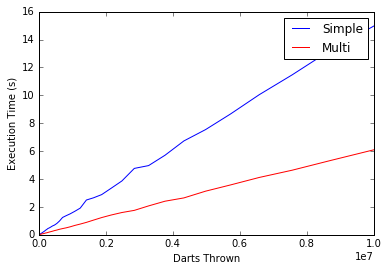

In [164]:
plt.plot(darts, times, 'b', label = 'Simple')
plt.plot(darts_pool, times_pool, 'r', label = 'Multi')
plt.xlabel("Darts Thrown")
plt.ylabel("Execution Time (s)")
plt.legend()

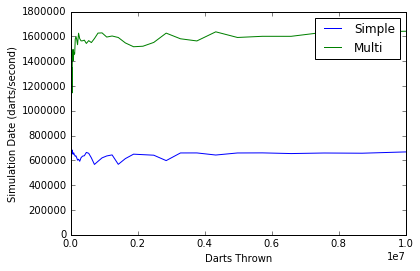

In [172]:
plt.plot(darts, rates, label = 'Simple')
plt.plot(darts_pool, rates_pool, label = 'Multi')
plt.xlabel("Darts Thrown")
plt.ylabel("Simulation Date (darts/second)")
plt.legend()

In [ ]:
import ipyparallel as ipp
from ipyparallel import Client

# ipyparallel version of pi approximation
def pypar(nDarts, nInCirc = 0):
    rc = Client()
    rc.block = True
    rc[:].execute('from random import uniform')
    rc[:].execute('from math import sqrt')
    startTime = time()
    res = rc[:].map_sync(checkDart, range(100))
    nInCirc = sum(res)
    executionTime = time() - startTime
    piApprox = 4 * nInCirc / float(nDarts)
    return(piApprox, executionTime, nDarts/executionTime)

# find computational time as f'n of nDarts
darts = np.logspace(1,7,100)
pyparResults = []
for d in darts:
    pyparResults.append(multi(int(d)))